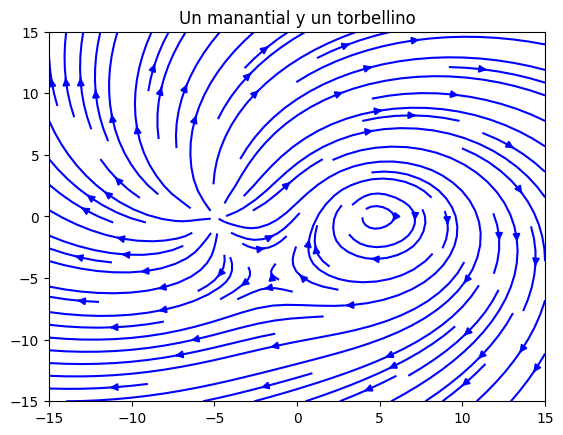

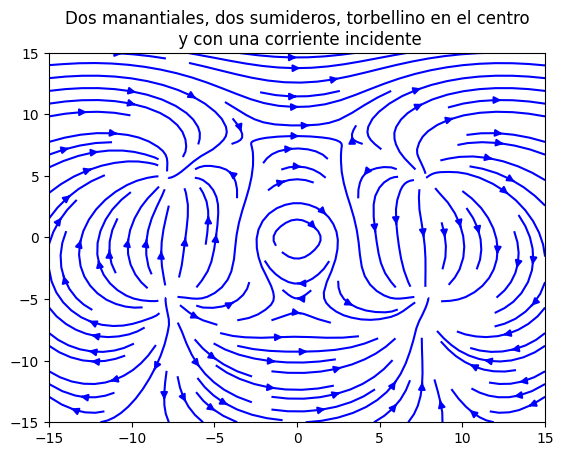

In [208]:
import matplotlib.pyplot as plt
import numpy as np
import cmath as c

x=np.linspace(-15,15,20)
y=np.linspace(-15,15,20)
X,Y=np.meshgrid(x,y)
U,V=np.meshgrid(x,y)


Q=20
gamma=30
uinf=0
def f(t):
    return uinf*t+(1/(2*np.pi))*(Q*c.log(t+5)+gamma*1j*c.log(t-5))

def prima(f,t,epsilon=10**(-10)):
    return (f(t+epsilon)-f(t))/(epsilon)
    # return Q/(2*np.pi*t)

def uv(f,t):
    u=prima(f,t).real
    v=-prima(f,t).imag
    return u,v
def dibujar(f):
    for i in range(len(x)):
        for j in range(len(y)):
            t=complex(x[i],y[j])
            u,v=uv(f,t)
            U[j,i]=u
            V[j,i]=v
    
    fig,ax=plt.subplots()
    ax.streamplot(X,Y,U,V,color='blue')
    

dibujar(f)
plt.title('Un manantial y un torbellino')
plt.show()
Q=5
gamma=6
Uinf=.05
def f2(t):
    t0=[-7.5+5j,7.5+5j,-7.5-5j,7.5-5j]
    ms0=[-1,1,1,-1]
    f2=Uinf*t
    for i in range(len(t0)):
        f2+=ms0[i]*c.log(t-t0[i])
    f2*=(Q/(2*np.pi))
    f2+=(gamma/(2*np.pi))*1j*c.log(t)
    return f2
dibujar(f2)
plt.title('Dos manantiales, dos sumideros, torbellino en el centro\n y con una corriente incidente')
plt.show()